In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
%matplotlib inline

## Animation of Confidence Interval

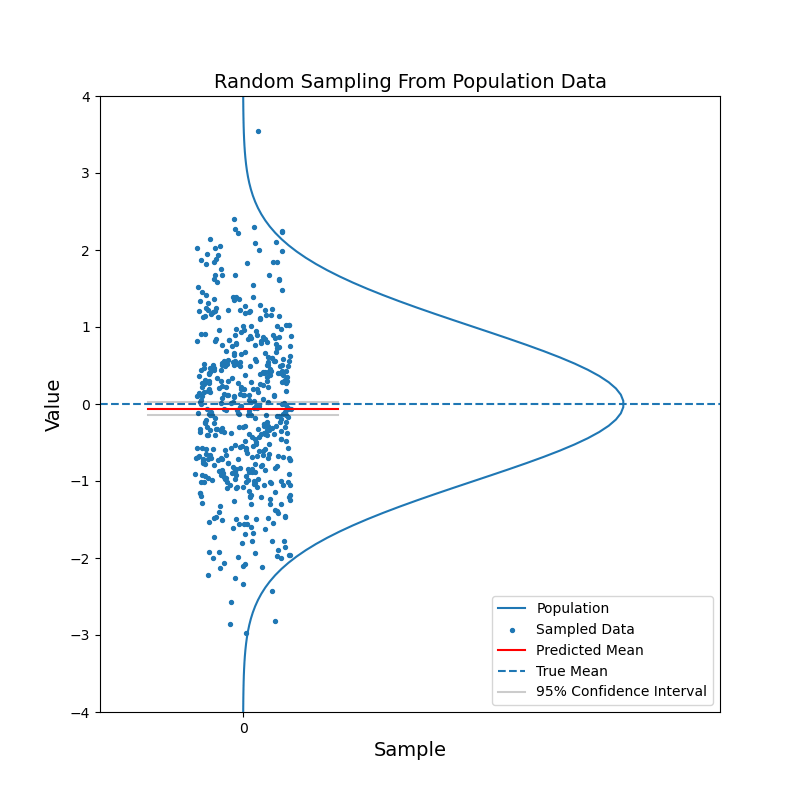

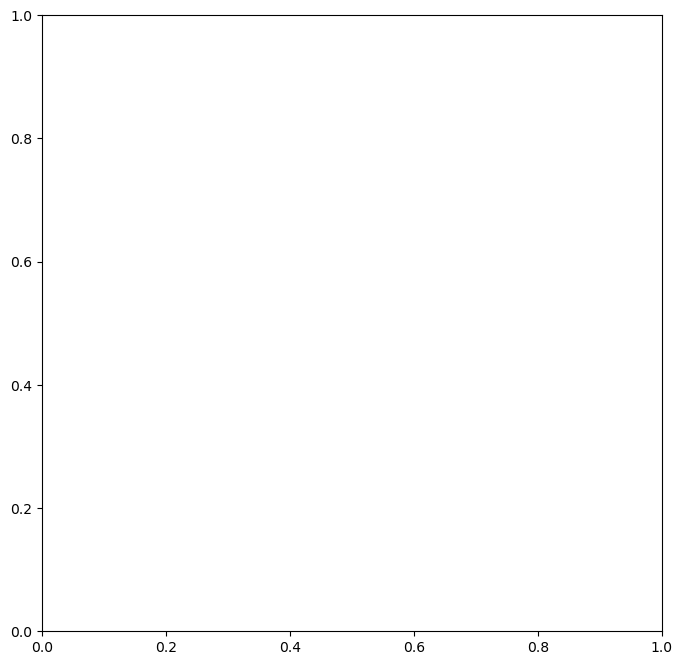

In [14]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import imageio

# Set parameters
mu = 0  # population mean
sigma = 1  # population standard deviation
n = 500  # sample size
alpha = 0.05  # significance level
reps = 100  # number of repetitions

# Generate population data
pop_data = np.random.normal(mu, sigma, 10000)

# Plot sample means and confidence intervals
fig, ax = plt.subplots(figsize=(8,8))
images = []

y_norm = np.linspace(-4,4,100)
x_norm = stats.norm.pdf(y_norm, mu, sigma)

# Generate samples and calculate confidence intervals
for i in range(reps):
    sample_data = np.random.choice(pop_data, size=n)
    sample_data_jitter = i + np.random.uniform(low=-0.05,high=0.05,size=n)
    sample_mean = np.mean(sample_data)
    # sample_means[i] = sample_mean
    z_crit = np.abs(stats.norm.ppf(alpha/2))
    conf_int = [sample_mean - z_crit * sigma/np.sqrt(n), sample_mean + z_crit * sigma/np.sqrt(n)]
    # conf_ints[i] = conf_int

    ax.plot(x_norm+i, y_norm, color='tab:blue', label='Population')
    ax.scatter(sample_data_jitter, sample_data, s=8, color='tab:blue', label='Sampled Data')
    
    # ax.plot(i, sample_mean, 'ro', alpha=0.2)
    ax.plot([i-0.1,i+0.1], [sample_mean,sample_mean], c='r', label='Predicted Mean')
    ax.axhline(mu, color='tab:blue', linestyle='--', label='True Mean')
    ax.plot([i-0.1,i+0.1], [conf_int[0], conf_int[0]], 'k-', alpha=0.2, label='95% Confidence Interval')
    ax.plot([i-0.1,i+0.1], [conf_int[1], conf_int[1]], 'k-', alpha=0.2)
    
    # Set axis labels and title
    ax.set_xlabel('Sample', fontsize=14)
    ax.set_ylabel('Value', fontsize=14)
    ax.set_title('Random Sampling From Population Data', fontsize=14)
    ax.set_xticks([i])
    ax.set_ylim(bottom=-4, top=4)
    ax.set_xlim(left=i-0.15,right=i+0.5)
    ax.legend(loc='lower right')

    # Save figure to a buffer
    fig.canvas.draw()
    buf = fig.canvas.tostring_rgb()

    # Add buffer to the list of images
    images.append(np.frombuffer(buf, dtype=np.uint8).reshape(fig.canvas.get_width_height()[::-1] + (3,)))

    # Clear the axis for the next frame
    ax.clear()

# Save images to a GIF animation
imageio.mimsave('/home/local/VANDERBILT/gaoc11/Projects/Variance-Aging-Diffusion/Experiments/CI_tutorial/confidence_intervals_xl_sample.gif', images, fps=5)

# Show the resulting GIF animation
from IPython.display import Image
Image(filename='/home/local/VANDERBILT/gaoc11/Projects/Variance-Aging-Diffusion/Experiments/CI_tutorial/confidence_intervals_xl_sample.gif')


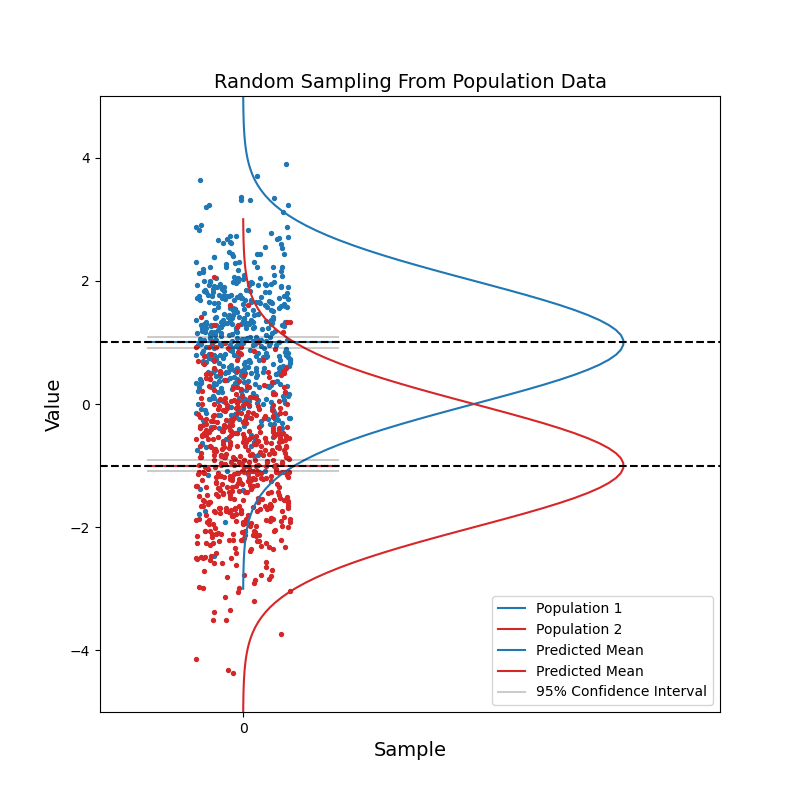

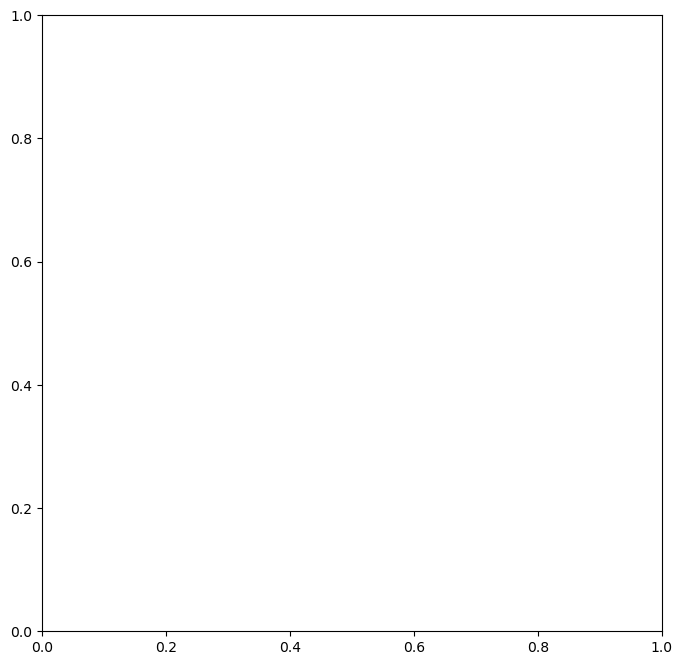

In [12]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import imageio

# Set parameters
mu1 = 1  # population mean
mu2 = -1
sigma = 1  # population standard deviation
n = 500  # sample size
alpha = 0.05  # significance level
reps = 100  # number of repetitions

# Generate population data
pop_data_1 = np.random.normal(mu1, sigma, 10000)
pop_data_2 = np.random.normal(mu2, sigma, 10000)
# Plot sample means and confidence intervals
fig, ax = plt.subplots(figsize=(8,8))
images = []

y_norm1 = np.linspace(-3,5,100)
x_norm1 = stats.norm.pdf(y_norm1, mu1, sigma)
y_norm2 = np.linspace(-5,3,100)
x_norm2 = stats.norm.pdf(y_norm2, mu2, sigma)

# Generate samples and calculate confidence intervals
for i in range(reps):
    sample_data_1 = np.random.choice(pop_data_1, size=n)
    sample_data_2 = np.random.choice(pop_data_2, size=n)
    sample_data_jitter = i + np.random.uniform(low=-0.05,high=0.05,size=n)
    sample_mean_1 = np.mean(sample_data_1)
    sample_mean_2 = np.mean(sample_data_2)
    
    z_crit = np.abs(stats.norm.ppf(alpha/2))
    conf_int_1 = [sample_mean_1 - z_crit * sigma/np.sqrt(n), sample_mean_1 + z_crit * sigma/np.sqrt(n)]
    conf_int_2 = [sample_mean_2 - z_crit * sigma/np.sqrt(n), sample_mean_2 + z_crit * sigma/np.sqrt(n)]

    ax.plot(x_norm1+i, y_norm1, color='tab:blue', label='Population 1')
    ax.plot(x_norm2+i, y_norm2, color='tab:red', label='Population 2')
    ax.scatter(sample_data_jitter, sample_data_1, s=8, color='tab:blue')
    ax.scatter(sample_data_jitter, sample_data_2, s=8, color='tab:red')
    
    ax.plot([i-0.1,i+0.1], [sample_mean_1,sample_mean_1], c='tab:blue', label='Predicted Mean')
    ax.axhline(mu1, color='k', linestyle='--')
    ax.plot([i-0.1,i+0.1], [conf_int_1[0], conf_int_1[0]], 'k-', alpha=0.2)
    ax.plot([i-0.1,i+0.1], [conf_int_1[1], conf_int_1[1]], 'k-', alpha=0.2)
    
    ax.plot([i-0.1,i+0.1], [sample_mean_2,sample_mean_2], c='tab:red', label='Predicted Mean')
    ax.axhline(mu2, color='k', linestyle='--')
    ax.plot([i-0.1,i+0.1], [conf_int_2[0], conf_int_2[0]], 'k-', alpha=0.2)
    ax.plot([i-0.1,i+0.1], [conf_int_2[1], conf_int_2[1]], 'k-', alpha=0.2, label='95% Confidence Interval')
    # Set axis labels and title
    ax.set_xlabel('Sample', fontsize=14)
    ax.set_ylabel('Value', fontsize=14)
    ax.set_title('Random Sampling From Population Data', fontsize=14)
    ax.set_xticks([i])
    ax.set_ylim(bottom=-5, top=5)
    ax.set_xlim(left=i-0.15,right=i+0.5)
    ax.legend(loc='lower right')

    # Save figure to a buffer
    fig.canvas.draw()
    buf = fig.canvas.tostring_rgb()

    # Add buffer to the list of images
    images.append(np.frombuffer(buf, dtype=np.uint8).reshape(fig.canvas.get_width_height()[::-1] + (3,)))

    # Clear the axis for the next frame
    ax.clear()

# Save images to a GIF animation
imageio.mimsave('/home/local/VANDERBILT/gaoc11/Projects/Variance-Aging-Diffusion/Experiments/CI_tutorial/confidence_intervals_two_distribution_xl_sample.gif', images, fps=5)

# Show the resulting GIF animation
from IPython.display import Image
Image(filename='/home/local/VANDERBILT/gaoc11/Projects/Variance-Aging-Diffusion/Experiments/CI_tutorial/confidence_intervals_two_distribution_xl_sample.gif')


## Toy example: seaborn and statsmodels

Text(0.5, 1.0, 'statsmodels.regression')

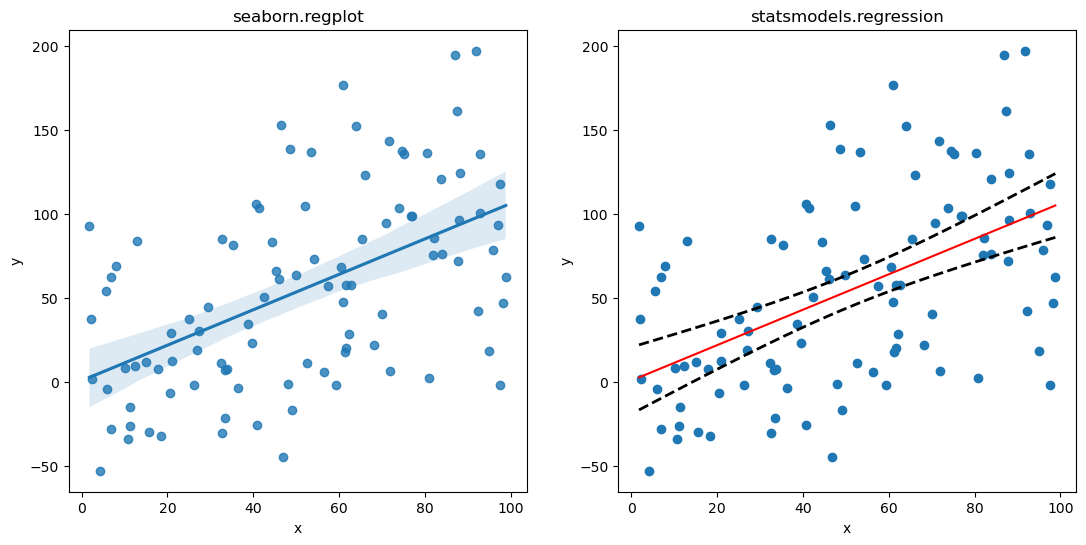

In [137]:
x = np.random.uniform(0, 100, size=100)
y = x + np.random.normal(loc=0, scale=50, size=100)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(13,6))

# Seaborn
sns.regplot(x=x, y=y, ax=axes[0])
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('seaborn.regplot')

# Stastmodels
axes[1].scatter(x,y)
X = np.column_stack((np.ones_like(x), x))
Y = y

results = sm.OLS(Y,X).fit()
st, dat, ss2 = summary_table(results, alpha=0.05)
predict_ci_low, predict_ci_upp = dat[:, 4:6].T

sorting = np.argsort(x)
x_sorted = x[sorting]
y_pred_sorted = results.fittedvalues[sorting]
predict_ci_low_sorted = predict_ci_low[sorting]
predict_ci_upp_sorted = predict_ci_upp[sorting]
# Regression line
axes[1].plot(x_sorted, y_pred_sorted, 'r-')
# Confidence interval 95%
axes[1].plot(x_sorted, predict_ci_low_sorted, 'k--', linewidth=2, label='95% Confidence Interval')
axes[1].plot(x_sorted, predict_ci_upp_sorted, 'k--', linewidth=2)
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('statsmodels.regression')

Text(0.5, 1.0, 'statsmodels.regression')

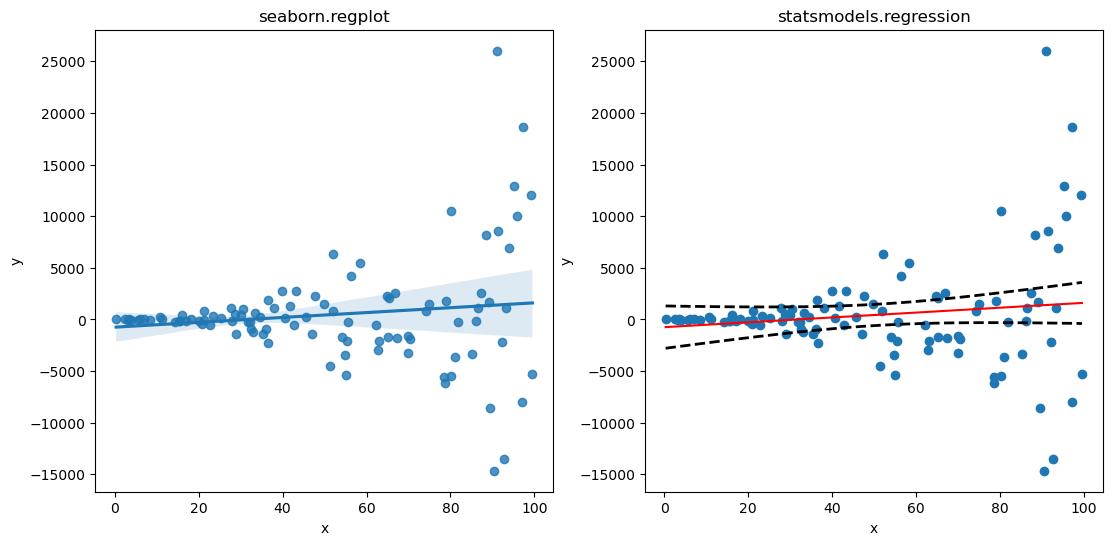

In [138]:
x = np.random.uniform(0, 100, size=100)
noise = np.zeros_like(x)
for i in range(100):
    noise[i] = np.random.normal(loc=0, scale=x[i]**2)
y = x + noise

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(13,6))

# Seaborn
sns.regplot(x=x, y=y, ci=95, ax=axes[0])
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('seaborn.regplot')

# Stastmodels
axes[1].scatter(x,y)
X = np.column_stack((np.ones_like(x), x))
Y = y

results = sm.OLS(Y,X).fit()
st, dat, ss2 = summary_table(results, alpha=0.05)
predict_ci_low, predict_ci_upp = dat[:, 4:6].T

sorting = np.argsort(x)
x_sorted = x[sorting]
y_pred_sorted = results.fittedvalues[sorting]
predict_ci_low_sorted = predict_ci_low[sorting]
predict_ci_upp_sorted = predict_ci_upp[sorting]
# Regression line
axes[1].plot(x_sorted, y_pred_sorted, 'r-')
# Confidence interval 95%
axes[1].plot(x_sorted, predict_ci_low_sorted, 'k--', linewidth=2, label='95% Confidence Interval')
axes[1].plot(x_sorted, predict_ci_upp_sorted, 'k--', linewidth=2)
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('statsmodels.regression')

## False Negative in Heteroskedasticity

(-370.8024595399497, 690.9396431026695)

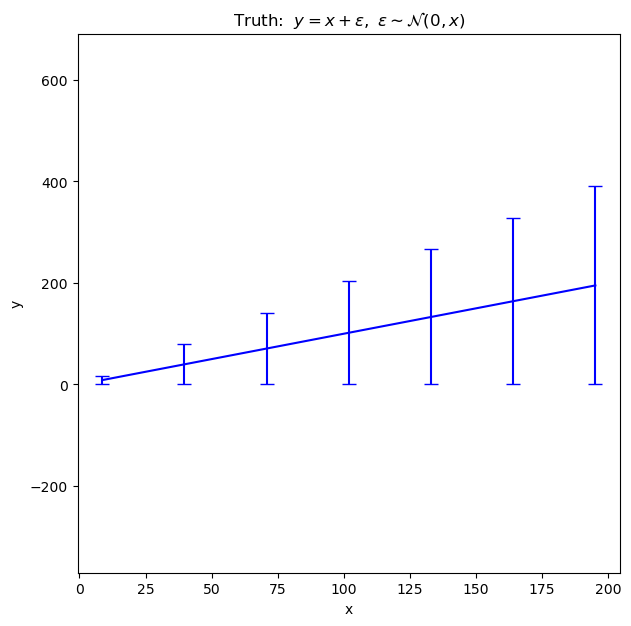

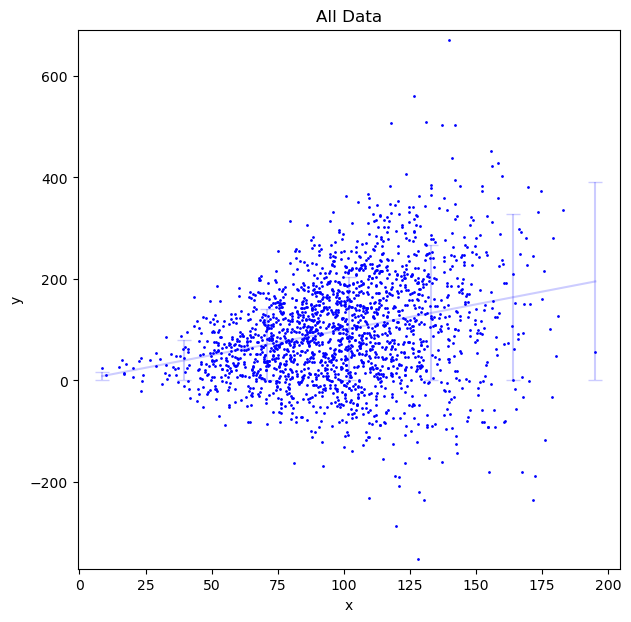

In [221]:
seed = 0
np.random.seed(seed)
num_total = 2000

# x = np.random.uniform(0, 100, size=num_total)
x = np.random.normal(loc=100, scale=30, size=num_total)
noise = np.zeros_like(x)
for i in range(num_total):
    noise[i] = np.random.normal(loc=0,scale=x[i])

y = 1 * x + noise

# Subplot-1: truth
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,7))

x_errplot = np.linspace(np.min(x), np.max(x), 7)
y_errplot = 1 * x_errplot
yerr = x_errplot

ax.errorbar(x_errplot, y_errplot, yerr=yerr, fmt='-b', capsize=5)
# ax.set_title('Mean and Standard Deviation of the Truth')
ax.set_title("Truth:\t"+ r"$y = x + \epsilon,\ \epsilon \sim \mathcal{N}(0, x)$")
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_ylim(top=np.max(y)+20,bottom=np.min(y)-20)

# Subplot-2: Data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,7))

ax.errorbar(x_errplot, y_errplot, yerr=yerr, fmt='-b', capsize=5, alpha=0.2)
ax.scatter(x, y, c='b', s=1)
ax.set_title('All Data')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_ylim(top=np.max(y)+20,bottom=np.min(y)-20)

Text(0.98, 0.04, 'p-values: [0.39161, 0.00198]')

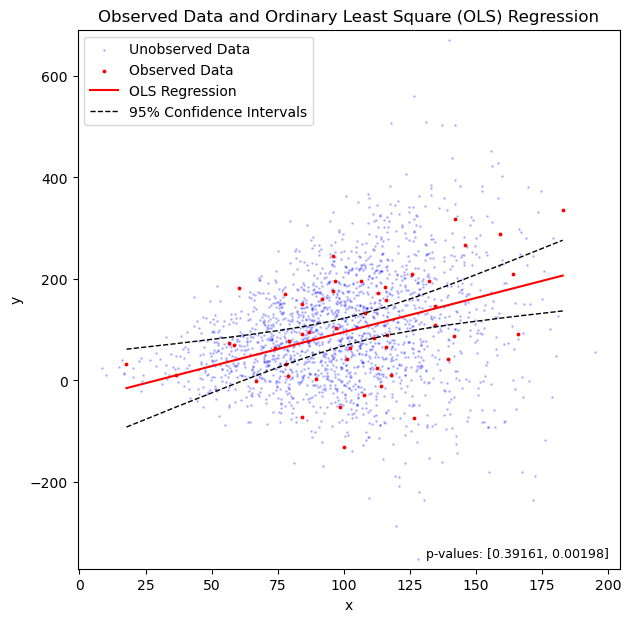

In [222]:
sample_size = 50
idxs = np.random.choice(num_total, size=sample_size, replace=False)
x_s = x[idxs]
y_s = y[idxs]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,7))

ax.scatter(x, y, c='b', s=1, alpha=0.2, label='Unobserved Data')
ax.scatter(x_s, y_s, c='r',s=3, label='Observed Data')
ax.set_title('Observed Data and Ordinary Least Square (OLS) Regression')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_ylim(top=np.max(y)+20,bottom=np.min(y)-20)

# Regression line and CI
X = np.column_stack((np.ones_like(x_s), x_s))
Y = y_s
results = sm.OLS(Y,X).fit()
st, dat, ss2 = summary_table(results, alpha=0.05)
predict_ci_low, predict_ci_upp = dat[:, 4:6].T

sorting = np.argsort(x_s)
x_sorted = x_s[sorting]
y_pred_sorted = results.fittedvalues[sorting]
predict_ci_low_sorted = predict_ci_low[sorting]
predict_ci_upp_sorted = predict_ci_upp[sorting]

ax.plot(x_sorted, y_pred_sorted, 'r-', label='OLS Regression')
ax.plot(x_sorted, predict_ci_low_sorted, 'k--', linewidth=1, label='95% Confidence Intervals')
ax.plot(x_sorted, predict_ci_upp_sorted, 'k--', linewidth=1)
ax.legend(loc='upper left')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.text(0.98, 0.04, "p-values: [{0:.5f}, {1:.5f}]".format(results.pvalues[0],results.pvalues[1]), 
        transform=ax.transAxes, fontsize=9,
        verticalalignment='top', horizontalalignment='right')

### How frequent it is?

In [225]:
# Run the previous 2 blocks before this one

sample_size = 50

num_fp = 0
for i in range(10000):
    idxs = np.random.choice(num_total, size=sample_size, replace=False)
    x_s = x[idxs]
    y_s = y[idxs]

    # Regression line and CI
    X = np.column_stack((np.ones_like(x_s), x_s))
    Y = y_s
    results = sm.OLS(Y,X).fit()

    if results.pvalues[1] > 0.05:
        num_fp += 1

print('Ran simulations for 10000 times.\nNumber of False Negatives: {0}'.format(num_fp))


Ran simulations for 10000 times.
Number of False Negatives: 5645


## False Positive in Heteroskedasticity

(-498.82785199494145, 551.2088806027944)

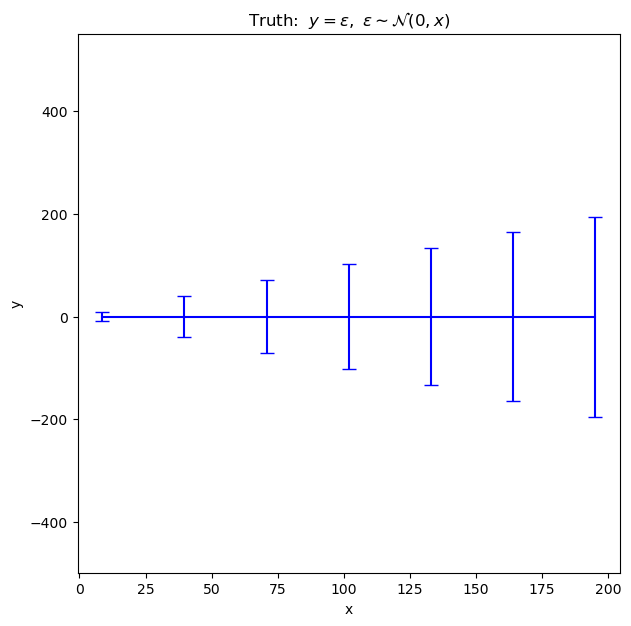

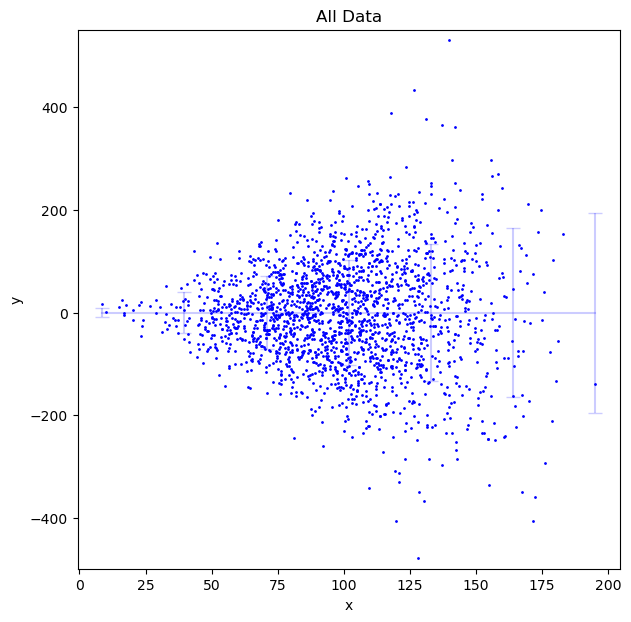

In [226]:
seed = 0
np.random.seed(seed)
num_total = 2000

# x = np.random.uniform(0, 100, size=num_total)
x = np.random.normal(loc=100, scale=30, size=num_total)
noise = np.zeros_like(x)
for i in range(num_total):
    noise[i] = np.random.normal(loc=0,scale=x[i])

y = noise

# Subplot-1: truth
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,7))

x_errplot = np.linspace(np.min(x), np.max(x), 7)
y_errplot = 0 * x_errplot
yerr = x_errplot

ax.errorbar(x_errplot, y_errplot, yerr=yerr, fmt='-b', capsize=5)
# ax.set_title('Mean and Standard Deviation of the Truth')
ax.set_title("Truth:\t"+ r"$y = \epsilon,\ \epsilon \sim \mathcal{N}(0, x)$")
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_ylim(top=np.max(y)+20,bottom=np.min(y)-20)

# Subplot-2: Data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,7))

ax.errorbar(x_errplot, y_errplot, yerr=yerr, fmt='-b', capsize=5, alpha=0.2)
ax.scatter(x, y, c='b', s=1)
ax.set_title('All Data')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_ylim(top=np.max(y)+20,bottom=np.min(y)-20)

Text(0.98, 0.04, 'p-values: [0.39161, 0.40668]')

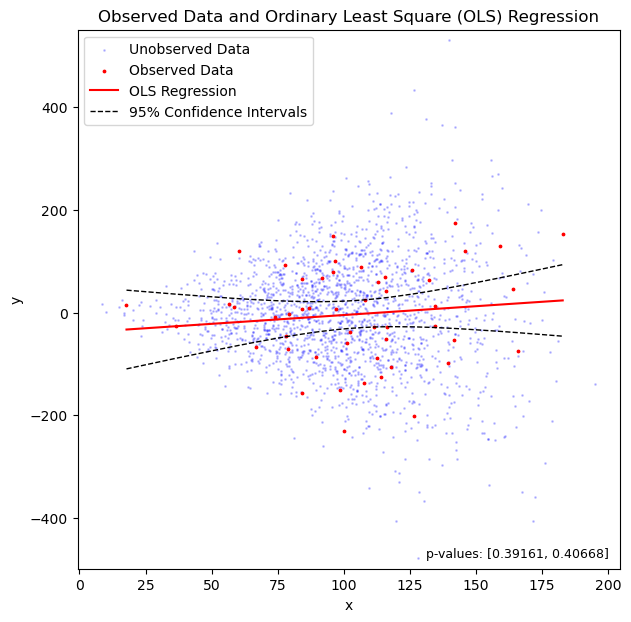

In [227]:
sample_size = 50
idxs = np.random.choice(num_total, size=sample_size, replace=False)
x_s = x[idxs]
y_s = y[idxs]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,7))

ax.scatter(x, y, c='b', s=1, alpha=0.2, label='Unobserved Data')
ax.scatter(x_s, y_s, c='r',s=3, label='Observed Data')
ax.set_title('Observed Data and Ordinary Least Square (OLS) Regression')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_ylim(top=np.max(y)+20,bottom=np.min(y)-20)

# Regression line and CI
X = np.column_stack((np.ones_like(x_s), x_s))
Y = y_s
results = sm.OLS(Y,X).fit()
st, dat, ss2 = summary_table(results, alpha=0.05)
predict_ci_low, predict_ci_upp = dat[:, 4:6].T

sorting = np.argsort(x_s)
x_sorted = x_s[sorting]
y_pred_sorted = results.fittedvalues[sorting]
predict_ci_low_sorted = predict_ci_low[sorting]
predict_ci_upp_sorted = predict_ci_upp[sorting]

ax.plot(x_sorted, y_pred_sorted, 'r-', label='OLS Regression')
ax.plot(x_sorted, predict_ci_low_sorted, 'k--', linewidth=1, label='95% Confidence Intervals')
ax.plot(x_sorted, predict_ci_upp_sorted, 'k--', linewidth=1)
ax.legend(loc='upper left')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.text(0.98, 0.04, "p-values: [{0:.5f}, {1:.5f}]".format(results.pvalues[0],results.pvalues[1]), 
        transform=ax.transAxes, fontsize=9,
        verticalalignment='top', horizontalalignment='right')

### How frequent it is?

In [228]:
# Run the previous 2 blocks before this one

sample_size = 50

num_fp = 0
for i in range(10000):
    idxs = np.random.choice(num_total, size=sample_size, replace=False)
    x_s = x[idxs]
    y_s = y[idxs]

    # Regression line and CI
    X = np.column_stack((np.ones_like(x_s), x_s))
    Y = y_s
    results = sm.OLS(Y,X).fit()

    if results.pvalues[1] < 0.05:
        num_fp += 1

print('Ran simulations for 10000 times.\nNumber of False Positives: {0}'.format(num_fp))


Ran simulations for 10000 times.
Number of False Positives: 688
